# Marvin Science Case Exercise
## Create a WHAN diagram

The Width of Halpha versus NII (WHAN) diagram (Cid Fernández et al. 2011, http://adsabs.harvard.edu/abs/2011MNRAS.413.1687C) can be used to classify galaxies as star-forming or quenched. Using only information of two emissions lines (H-alpha equivalent width and NII flux, both available in the DAP), it is very useful for classifying galaxies that cannot be classified using BPT diagrams due to absent absorption lines.

One of the main advantages of this diagram is that you can distinguish two populations within the LI(N)ER classification in BPT: galaxies hosting a weak AGN and what they refer in the paper as ''retired galaxies'' (galaxies that are not forming stars but are ionized by hot low-mass evolved stars). So the WHAN diagram allows for the identification of galaxies in which the heating of their ionised gas is the result of old stars, rather than star formation or AGN activity.

Five classes of galaxies are identified within the WHAN diagram:
- Pure star forming galaxies: log[N ii]/Hα < −0.4 and WHα > 3 Å
- Strong AGN (i.e., Seyferts): log[N ii]/Hα > −0.4 and WHα > 6 Å
- Weak AGN: log[N ii]/Hα > −0.4 and WHα between 3 and 6 Å
- Retired galaxies (i.e., fake AGN): WHα < 3 Å
- Passive galaxies (actually, line-less galaxies): WHα and W[N ii] < 0.5 Å

### Using the Marvin web Image Roulette page, choose a galaxy that is visually interesting.  Refresh the page to generate a new set of images  

### Use the Marvin tools and utilities available to create a WHAN diagram for a MaNGA galaxy.  Using Marvin, create a custom galaxy map using your spaxel WHAN classificiations.  

### Compare and contrast the WHAN diagrams to the galaxy's BPT diagram.          

In [4]:
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np

from marvin.tools.maps import Maps

# import Marvin plot map utility function
import marvin.utils.plot.map as mapplot

%matplotlib inline

In [5]:
# select a galaxy
plateifu = '8485-1901'

# instanstiate a Marvin maps
maps = Maps(plateifu=plateifu)

# grab the NII/Ha flux ratio, Ha and NII equivalent width arrays
niiha = maps.emline_gflux_nii_6585/maps.emline_gflux_ha_6564
ewha = maps['emline_sew_ha_6564']
ewnii = maps['emline_sew_nii_6585']

# take the log of the NII/Ha ratio
logniiha = np.log10(niiha.value)

In [6]:
# create the WHAN categories
psf = (logniiha < -0.4) & (ewha.value > 3)
sagn = (logniiha > -0.4) & (ewha.value > 6)
wagn = (logniiha > -0.4) & ((ewha.value > 3) & (ewha.value < 6))
rg = ewha.value < 3
pg = (ewha.value < 0.5) & (ewnii.value < 0.5) 

In [7]:
# create a custom array for a WHAN categories (we copy the EW Ha array just to get a 2d-array of the original size)
value = ewha.value.copy()
value[psf] = 1     # pure star-forming 
value[sagn] = 2    # strong agn
value[wagn] = 3    # weak agn
value[rg] = 4      # retired galaxies
value[pg] = 5      # passive galaxies

# Set ivar to 0 where the SNR < 1
niiha_low_snr = mapplot.mask_low_snr(niiha.value, niiha.ivar, snr_min=1)
ewha_low_snr = mapplot.mask_low_snr(ewha.value, ewha.ivar, snr_min=1)
ewnii_low_snr = mapplot.mask_low_snr(ewnii.value, ewnii.ivar, snr_min=1)
low_snr = np.logical_or(niiha_low_snr, ewha_low_snr, ewnii_low_snr)

ivar = ewha.value.copy()
ivar[low_snr] = 0

nocov = ewha.pixmask.get_mask('NOCOV')

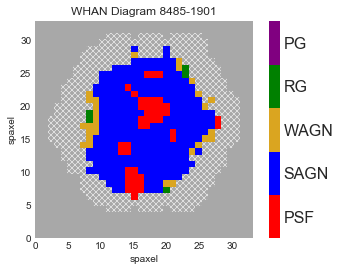

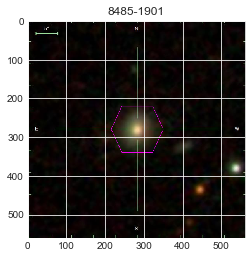

In [13]:
# create a custom colormap
cmap = colors.ListedColormap(['red', 'blue', 'goldenrod', 'green', 'purple'])

# use Marvin plotting to plot our WHAN diagram
fig, ax, cb = mapplot.plot(value=value, ivar=ivar, mask=nocov, cmap=cmap, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5),
                           title='WHAN Diagram {}'.format(plateifu))


# Set the custom colorbar axis values
cb.set_ticks([1, 2, 3, 4, 5])
cb.set_ticklabels(['PSF', 'SAGN', 'WAGN', 'RG', 'PG'])

# plot the figure
plt.show()

# let's also show the optical image
from marvin.utils.general.images import showImage
image = showImage(plateifu=plateifu, show_image=False)
img = plt.imshow(image)
plt.title(str(plateifu))

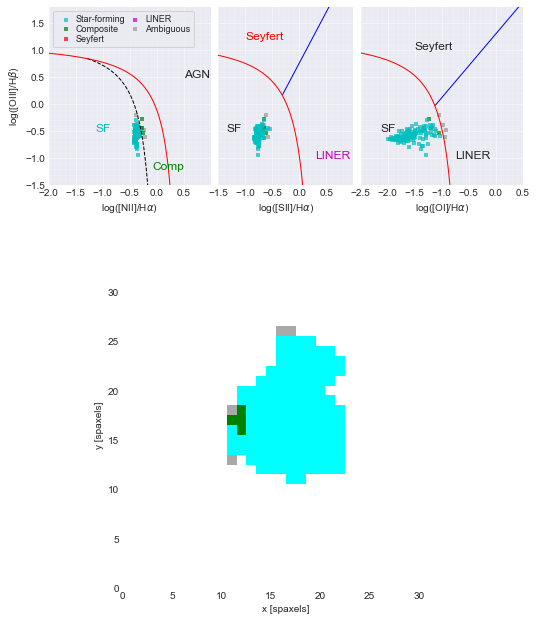

In [10]:
# compare with the BPT diagram for this galaxy
mask, fig, axes = maps.get_bpt()